In [1]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles

In [2]:
x, y = make_circles(n_samples=750, factor=0.3, noise=0.1)
#y is created but is the output feature and thus not used

In [3]:
x

array([[ 1.11106064,  0.39173678],
       [-0.53875858,  0.67853015],
       [ 0.43604064,  0.08691077],
       ...,
       [-0.6978452 , -0.80322118],
       [ 0.04502825, -0.20843112],
       [-0.10121622,  0.23649018]])

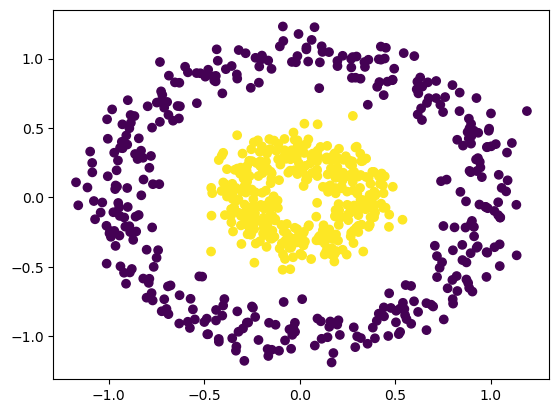

In [4]:
plt.scatter(x[:,0],x[:,1],c=y)
#using y gives two groups and not clusters/outliers

In [5]:
dbscan = DBSCAN(eps=0.1)

In [6]:
dbscan.fit_predict(x)

array([ 6,  5,  0,  1,  0,  0,  0,  2,  7,  0,  3, -1,  0,  0,  4,  0,  0,
        2,  4,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  9,  5,  0,  0,  6,  0,  0,  0,  7,  8,  0,  2,  0,  0,  6,
        0,  0,  3,  0,  0,  0,  0,  1,  6,  4,  0,  0,  9,  0,  0, -1,  0,
       -1,  0,  3,  0,  1,  7,  0,  0,  0,  4,  5,  0,  0,  0, -1,  1,  0,
        0,  0,  0,  0,  0,  6,  1,  5,  6, -1,  0,  0,  3,  0, -1,  0, 10,
        0,  3,  9,  0,  0,  5,  5,  0,  3, 11, 11,  0,  0,  0, 11,  0,  0,
        0, 11, -1, -1,  0,  0,  0,  9,  0,  0,  0,  8,  6,  3,  3,  7,  0,
        3,  9,  9,  0,  7,  2,  0, 11,  0, 12,  0,  2,  0, 12,  0,  0,  0,
       13,  0,  3, 14,  6, 11, -1, -1, -1,  5,  0,  0,  1,  3,  3,  5,  5,
       15,  0,  0, -1, 14,  0,  4, 11, -1,  0,  6,  3,  5,  1, 15,  5,  0,
        6,  0,  0,  6,  0,  0, -1, 11, 11,  0,  0, 15, 15,  5,  0,  0,  0,
        5,  1, -1,  0,  0,  0, 15, 14,  5,  0,  0,  3,  0,  0, -1, 13,  0,
        0,  0,  0, -1,  0

In [7]:
dbscan.labels_

array([ 6,  5,  0,  1,  0,  0,  0,  2,  7,  0,  3, -1,  0,  0,  4,  0,  0,
        2,  4,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  9,  5,  0,  0,  6,  0,  0,  0,  7,  8,  0,  2,  0,  0,  6,
        0,  0,  3,  0,  0,  0,  0,  1,  6,  4,  0,  0,  9,  0,  0, -1,  0,
       -1,  0,  3,  0,  1,  7,  0,  0,  0,  4,  5,  0,  0,  0, -1,  1,  0,
        0,  0,  0,  0,  0,  6,  1,  5,  6, -1,  0,  0,  3,  0, -1,  0, 10,
        0,  3,  9,  0,  0,  5,  5,  0,  3, 11, 11,  0,  0,  0, 11,  0,  0,
        0, 11, -1, -1,  0,  0,  0,  9,  0,  0,  0,  8,  6,  3,  3,  7,  0,
        3,  9,  9,  0,  7,  2,  0, 11,  0, 12,  0,  2,  0, 12,  0,  0,  0,
       13,  0,  3, 14,  6, 11, -1, -1, -1,  5,  0,  0,  1,  3,  3,  5,  5,
       15,  0,  0, -1, 14,  0,  4, 11, -1,  0,  6,  3,  5,  1, 15,  5,  0,
        6,  0,  0,  6,  0,  0, -1, 11, 11,  0,  0, 15, 15,  5,  0,  0,  0,
        5,  1, -1,  0,  0,  0, 15, 14,  5,  0,  0,  3,  0,  0, -1, 13,  0,
        0,  0,  0, -1,  0

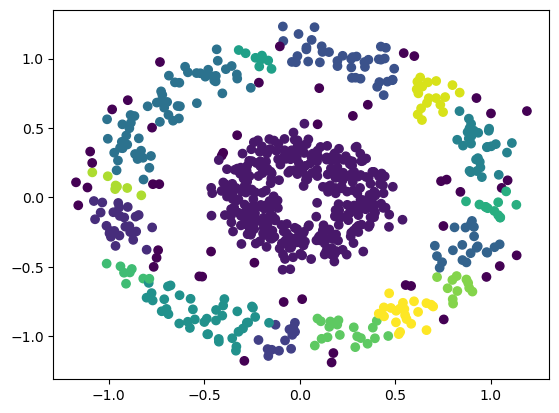

In [9]:
plt.scatter(x[:,0],x[:,1],c=dbscan.labels_)

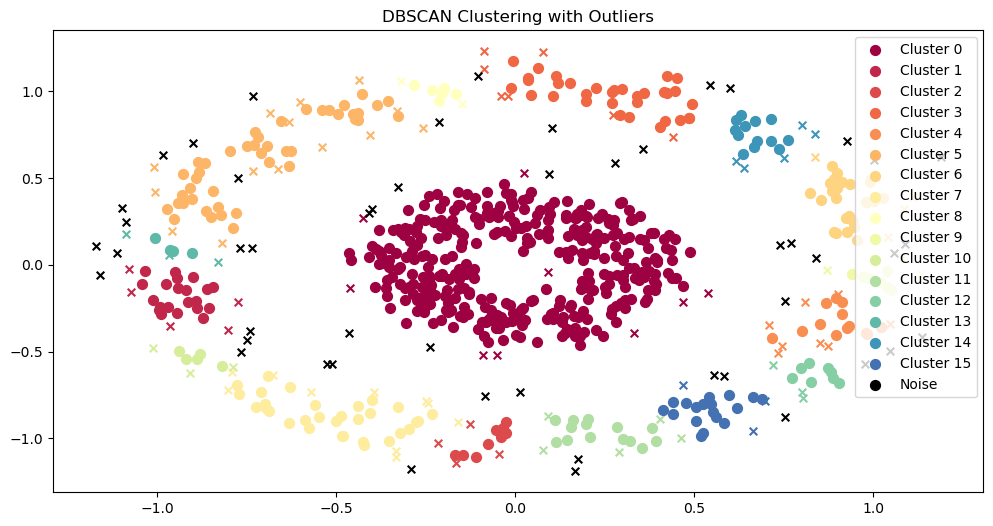

In [17]:
labels = dbscan.labels_

# Identify core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

# Unique labels (-1 is noise)
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(12, 6))

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise (outliers)
        col = 'k'
    
    class_member_mask = (labels == k)
    
    xy = x[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, color=col, marker='o', label=f'Cluster {k}' if k != -1 else 'Noise')
    
    xy = x[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=30, color=col, marker='x')  # Border points

plt.title('DBSCAN Clustering with Outliers')
plt.legend()
plt.show()
